## 00_readingInput.py
---
如何讀入資料

In [1]:
# %load 00_readingInput.py
import numpy as np
np.random.seed(1337)

''' Read input files '''
my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)

''' The first column to the 199th column is used as input features '''
X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

''' The 200-th column is the answer '''
y_train = my_data[:,200]
y_train = y_train.astype('int')

''' Convert to one-hot encoding '''
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train,5)

''' Shuffle training data '''
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

print("numbers of data in training set: %g" % X_train.shape[0])
print("numbers of features: %g" % X_train.shape[1])
print("numbers of classes: %g" % Y_train.shape[1])

Using TensorFlow backend.


numbers of data in training set: 1836
numbers of features: 200
numbers of classes: 5


## 00_firstmodel.py
---
隨便刻的第一個模型

In [2]:
# %load 00_firstModel.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile("00_readingInput.py")

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# print 'Building a model whose loss function is categorical_crossentropy'
''' For categorical_crossentropy '''
model_ce = Sequential()
model_ce.add(Dense(128, input_dim=200))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(256))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(5))
model_ce.add(Activation('softmax'))

''' Set up the optimizer '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

''' Compile model with specified loss and optimizer '''
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

'''Fit models and use validation_split=0.1 '''
history_ce = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
                    		validation_split=0.1)

'''Access the loss and accuracy in every epoch'''
loss_ce	= history_ce.history.get('loss')
acc_ce 	= history_ce.history.get('acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.title('Accuracy')
plt.savefig('00_firstModel.png',dpi=300,format='png')
plt.close()
print('Result saved into 00_firstModel.png')

Train on 1652 samples, validate on 184 samples
Epoch 1/30
1652/1652 [==============================] - 1s - loss: 1.3802 - acc: 0.5024 - val_loss: 1.3445 - val_acc: 0.5163
Epoch 2/30
1652/1652 [==============================] - 0s - loss: 1.3555 - acc: 0.5163 - val_loss: 1.3283 - val_acc: 0.5163
Epoch 3/30
1652/1652 [==============================] - 0s - loss: 1.3526 - acc: 0.5163 - val_loss: 1.3725 - val_acc: 0.5163
Epoch 4/30
1652/1652 [==============================] - 0s - loss: 1.3520 - acc: 0.5163 - val_loss: 1.3508 - val_acc: 0.5163
Epoch 5/30
1652/1652 [==============================] - 0s - loss: 1.3442 - acc: 0.5163 - val_loss: 1.3204 - val_acc: 0.5163
Epoch 6/30
1652/1652 [==============================] - 0s - loss: 1.3420 - acc: 0.5163 - val_loss: 1.3109 - val_acc: 0.5163
Epoch 7/30
1652/1652 [==============================] - 0s - loss: 1.3375 - acc: 0.5163 - val_loss: 1.3066 - val_acc: 0.5163
Epoch 8/30
1652/1652 [==============================] - 0s - loss: 1.3340 - ac

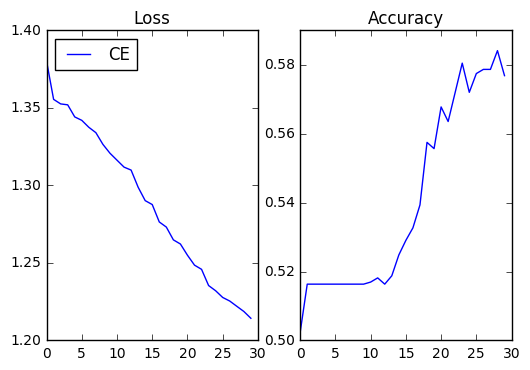

In [3]:
%matplotlib inline
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.title('Accuracy')
plt.show()

## 01_lossFunctionSelection
---
比較兩種 loss function 在分類問題上的差別
* Mean square error
* categorical crossentropy

In [4]:
# %load 01_lossFuncSelection.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# print 'Building a model whose loss function is categorical_crossentropy'
''' For categorical_crossentropy '''
model_ce = Sequential()
model_ce.add(Dense(128, input_dim=200))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(256))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(5))
model_ce.add(Activation('softmax'))

# print 'Building a model whose loss function is mean_squared_error'
''' For mean_squared_error '''
model_mse = Sequential()
model_mse.add(Dense(128, input_dim=200))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(256))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(5))
model_mse.add(Activation('softmax'))

''' Set up the optimizer '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

''' Compile model with specified loss and optimizer '''
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])

model_mse.compile(loss= 'mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

'''Fit models and use validation_split=0.1 '''
history_ce = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

history_mse = model_mse.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

'''Access the loss and accuracy in every epoch'''
loss_ce	= history_ce.history.get('loss')
acc_ce 	= history_ce.history.get('acc')
loss_mse= history_mse.history.get('loss')
acc_mse = history_mse.history.get('acc')

''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.plot(range(len(loss_mse)), loss_mse,label='MSE')
plt.title('Loss')
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.plot(range(len(acc_mse)), acc_mse,label='MSE')
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.savefig('01_lossFuncSelection.png',dpi=300,format='png')
plt.close()
print('Result saved into 01_lossFuncSelection.png')


Train on 1652 samples, validate on 184 samples
Epoch 1/30
0s - loss: 1.3832 - acc: 0.5024 - val_loss: 1.3342 - val_acc: 0.5163
Epoch 2/30
0s - loss: 1.3559 - acc: 0.5163 - val_loss: 1.3229 - val_acc: 0.5163
Epoch 3/30
0s - loss: 1.3525 - acc: 0.5163 - val_loss: 1.3321 - val_acc: 0.5163
Epoch 4/30
0s - loss: 1.3477 - acc: 0.5163 - val_loss: 1.3303 - val_acc: 0.5163
Epoch 5/30
0s - loss: 1.3416 - acc: 0.5163 - val_loss: 1.3608 - val_acc: 0.5163
Epoch 6/30
0s - loss: 1.3411 - acc: 0.5163 - val_loss: 1.3262 - val_acc: 0.5163
Epoch 7/30
0s - loss: 1.3358 - acc: 0.5163 - val_loss: 1.3548 - val_acc: 0.5163
Epoch 8/30
0s - loss: 1.3352 - acc: 0.5163 - val_loss: 1.3211 - val_acc: 0.5163
Epoch 9/30
0s - loss: 1.3227 - acc: 0.5163 - val_loss: 1.3243 - val_acc: 0.5163
Epoch 10/30
0s - loss: 1.3223 - acc: 0.5163 - val_loss: 1.2865 - val_acc: 0.5163
Epoch 11/30
0s - loss: 1.3144 - acc: 0.5163 - val_loss: 1.3061 - val_acc: 0.5707
Epoch 12/30
0s - loss: 1.3100 - acc: 0.5176 - val_loss: 1.3167 - val_ac

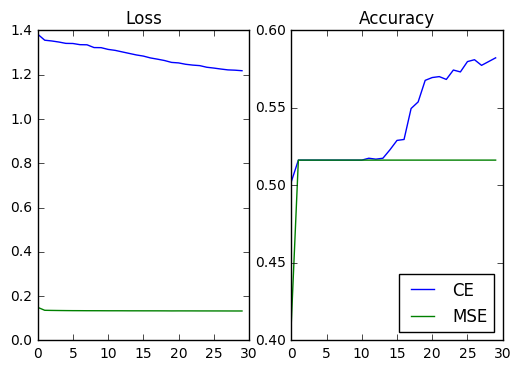

In [5]:
%matplotlib inline
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.plot(range(len(loss_mse)), loss_mse,label='MSE')
plt.title('Loss')
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.plot(range(len(acc_mse)), acc_mse,label='MSE')
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.show()

## 02_learningRate
---
比較三種 learning rate (0.1, 0.01, 0.001) under SGD optimizer

In [6]:
# %load 02_learningRateSelection.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Activation

print('Building model using SGD(lr=0.1)')
''' 1. Model using large learning rate '''
model_large = Sequential()
model_large.add(Dense(128, input_dim=200))
model_large.add(Activation('sigmoid'))
model_large.add(Dense(256))
model_large.add(Activation('sigmoid'))
model_large.add(Dense(5))
model_large.add(Activation('softmax'))

''' set the learning rate of SGD optimizer to 0.1 '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd1 = SGD(lr=0.1,momentum=0.0,decay=0.0,nesterov=False)

model_large.compile(loss= 'categorical_crossentropy',
              optimizer=sgd1,
              metrics=['accuracy'])

history_large = model_large.fit(X_train, Y_train,
								batch_size=batch_size,
								epochs=epochs,
								verbose=0,
								shuffle=True,
                    			validation_split=0.1)

loss_large = history_large.history.get('loss')
acc_large = history_large.history.get('acc')

print('Building model using SGD(lr=0.01)')
''' 2. Model using median learning rate '''
model_median = Sequential()
model_median.add(Dense(128, input_dim=200))
model_median.add(Activation('sigmoid'))
model_median.add(Dense(256))
model_median.add(Activation('sigmoid'))
model_median.add(Dense(5))
model_median.add(Activation('softmax'))

''' set the learning rate of SGD optimizer to 0.01 '''
sgd2 = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

model_median.compile(loss= 'categorical_crossentropy',
              optimizer=sgd2,
              metrics=['accuracy'])

history_median = model_median.fit(X_train, Y_train,
						batch_size=batch_size,
						epochs=epochs,
						verbose=0,
						shuffle=True,
                    	validation_split=0.1)

loss_median = history_median.history.get('loss')
acc_median = history_median.history.get('acc')

print('Building model using SGD(lr=0.001)')
''' 3. Model using small learning rate '''
model_small = Sequential()
model_small.add(Dense(128, input_dim=200))
model_small.add(Activation('sigmoid'))
model_small.add(Dense(256))
model_small.add(Activation('sigmoid'))
model_small.add(Dense(5))
model_small.add(Activation('softmax'))

''' set the learning rate of SGD optimizer to 0.001 '''
sgd3 = SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False)

model_small.compile(loss= 'categorical_crossentropy',
              optimizer=sgd3,
              metrics=['accuracy'])

history_small = model_small.fit(X_train, Y_train,
						batch_size=batch_size,
						epochs=epochs,
						verbose=0,
						shuffle=True,
                    	validation_split=0.1)

loss_small = history_small.history.get('loss')
acc_small = history_small.history.get('acc')

Building model using SGD(lr=0.1)
Building model using SGD(lr=0.01)
Building model using SGD(lr=0.001)


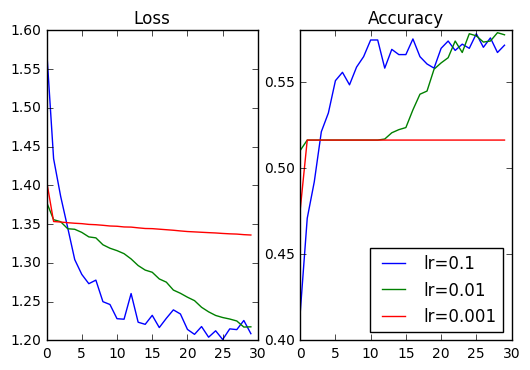

Result saved into 02_learningRateSelection.png


In [7]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_large)), loss_large,label='lr=0.1')
plt.plot(range(len(loss_median)), loss_median,label='lr=0.01')
plt.plot(range(len(loss_small)), loss_small,label='lr=0.001')
plt.title('Loss')
plt.subplot(122)
plt.plot(range(len(acc_large)), acc_large,label='lr=0.1')
plt.plot(range(len(acc_median)), acc_median,label='lr=0.01')
plt.plot(range(len(acc_small)), acc_small,label='lr=0.001')
plt.title('Accuracy')
plt.legend(loc='lower right')
#plt.savefig('02_learningRateSelection.png',dpi=300,format='png')
#plt.close()
plt.show()
print('Result saved into 02_learningRateSelection.png')

## 03_activationFuncSelection
---
比較不同的 activation function 對 performance 的影響

In [25]:
# %load 03_activationFuncSelection.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.advanced_activations import LeakyReLU

print('Building model using relu as activation function')
''' Use relu as our activation function '''
model_sp = Sequential()
model_sp.add(Dense(128, input_dim=200))
model_sp.add(Activation('relu'))
model_sp.add(Dense(256))
model_sp.add(Activation('relu'))
model_sp.add(Dense(5))
model_sp.add(Activation('softmax'))

''' Use SGD(lr=0.01) as the optimizer  '''
''' lr set to 0.01 according to 02_learningRateSelection.py '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

model_sp.compile(loss= 'categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history_sp = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_sp = history_sp.history.get('loss')
acc_sp = history_sp.history.get('acc')

print('Building model using sigmoid as activation function')
# reference
model_bm = Sequential()
model_bm.add(Dense(128, input_dim=200))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(256))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(5))
model_bm.add(Activation('softmax'))
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)
model_bm.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_bm = model_bm.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_bm	= history_bm.history.get('loss')
acc_bm 	= history_bm.history.get('acc')

print('Building model using leaky_relu as activation function')
# reference
lrelu = LeakyReLU(alpha = 0.02)
model_sm = Sequential()
model_sm.add(Dense(128, input_dim=200))
model_sm.add(lrelu)
model_sm.add(Dense(256))
model_sm.add(lrelu)
model_sm.add(Dense(5))
model_sm.add(Activation('softmax'))
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)
model_sm.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_sm = model_sm.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_sm	= history_sm.history.get('loss')
acc_sm 	= history_sm.history.get('acc')

Building model using relu as activation function
Building model using sigmoid as activation function
Building model using leaky_relu as activation function


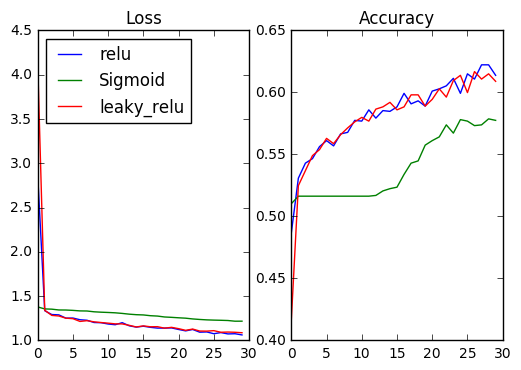

In [28]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_sp)),loss_sp,label='relu')
plt.plot(range(len(loss_bm)),loss_bm,label='Sigmoid')
plt.plot(range(len(loss_sm)),loss_sm,label='leaky_relu')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_sp)),acc_sp,label='relu')
plt.plot(range(len(acc_bm)),acc_bm,label='Sigmoid')
plt.plot(range(len(acc_sm)),acc_sm,label='leaky_relu')
plt.title('Accuracy')
#plt.savefig('03_activationFuncSelection.png',dpi=300,format='png')
#plt.close()
#print('Result saved into 03_activationFuncSelection.png')
plt.show()



## 04_optimizer
---
比較不同 optimizer 的影響

In [10]:
# %load 04_optimizerSelection.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 30

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Activation

print('Building a model whose optimizer="Adam", activation function=relu')
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

''' Setting optimizer as Adam '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')

print('Building a model whose optimizer="SGD", activation function=relu')
model_sgd = Sequential()
model_sgd.add(Dense(128, input_dim=200))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(256))
model_sgd.add(Activation('relu'))
model_sgd.add(Dense(5))
model_sgd.add(Activation('softmax'))

''' Setting optimizer as SGD '''
model_sgd.compile(loss='categorical_crossentropy',
				optimizer='SGD',
				metrics=['accuracy'])

history_sgd = model_sgd.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_sgd= history_sgd.history.get('loss')
acc_sgd = history_sgd.history.get('acc')

Building a model whose optimizer="Adam", activation function=relu
Building a model whose optimizer="SGD", activation function=relu


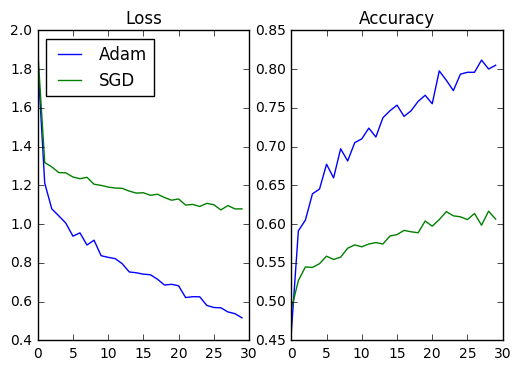

In [11]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Adam')
plt.plot(range(len(loss_sgd)), loss_sgd,label='SGD')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Adam')
plt.plot(range(len(acc_sgd)), acc_sgd,label='SGD')
plt.title('Accuracy')
#plt.savefig('04_optimizerSelection.png',dpi=300,format='png')
#plt.close()
#print('Result saved into 04_optimizerSelection.png')
plt.show()

## 05_overfitting Check
---


In [12]:
# %load 05_overfittingCheck.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 50

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Activation

print('Building a model whose optimizer="Adam", activation function=relu')
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

''' Setting optimizer as Adam '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')

''' Access the performance on validation data '''
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

Building a model whose optimizer="Adam", activation function=relu


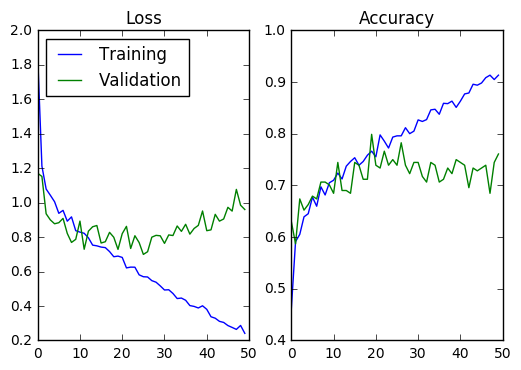

In [13]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')
#plt.savefig('05_overfittingCheck.png',dpi=300,format='png')
#plt.close()
#print('Result saved into 05_overfittingCheck.png')

plt.show()

## 06_regularizers
---
對付 overfit 的方法 - 1 <br>
比較不同的 regulizers

In [14]:
# %load 06_regularizerl1l2.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' Import l1,l2 (regularizer) '''
from keras.regularizers import l1,l2, l1_l2

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 50

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

def build_model_with_regulizers(l1n = 0., l2n = 0.):
    print('Building a model with regularizer L1: %g, L2: %g' % (l1n, l2n))
    model = Sequential()
    model.add(Dense(128, input_dim=200, kernel_regularizer=l1_l2(l1 = l1n, l2 = l2n) ))
    model.add(Activation('relu'))
    model.add(Dense(256, kernel_regularizer=l1_l2(l1 = l1n, l2 = l2n) ))
    model.add(Activation('relu'))
    model.add(Dense(5, kernel_regularizer=l1_l2(l1 = l1n, l2 = l2n)))
    model.add(Activation('softmax'))

    return model

''' Setting optimizer as Adam '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_l2 = build_model_with_regulizers(l1n = 0, l2n = 0.005)
model_l2.compile(loss= 'categorical_crossentropy',
              	optimizer='Adam',
              	metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_l2 = model_l2.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_l2 = history_l2.history.get('loss')
acc_l2 = history_l2.history.get('acc')
val_loss_l2 = history_l2.history.get('val_loss')
val_acc_l2 = history_l2.history.get('val_acc')


model_l2a = build_model_with_regulizers(l1n = 0, l2n = 0.5)
model_l2a.compile(loss= 'categorical_crossentropy',
              	optimizer='Adam',
              	metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_l2a = model_l2a.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_l2a = history_l2a.history.get('loss')
acc_l2a = history_l2a.history.get('acc')
val_loss_l2a = history_l2a.history.get('val_loss')
val_acc_l2a = history_l2a.history.get('val_acc')

##
model_l1 = build_model_with_regulizers(l1n = 0.005, l2n = 0.)
model_l1.compile(loss= 'categorical_crossentropy',
              	optimizer='Adam',
              	metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_l1 = model_l1.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_l1 = history_l1.history.get('loss')
acc_l1 = history_l1.history.get('acc')
val_loss_l1 = history_l1.history.get('val_loss')
val_acc_l1 = history_l1.history.get('val_acc')

# reference
print('model without regularizers')
model_adam = build_model_with_regulizers(l1n = 0., l2n = 0.)
''' Setting optimizer as Adam '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
''' Access the performance on validation data '''
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

Building a model with regularizer L1: 0, L2: 0.005
Building a model with regularizer L1: 0, L2: 0.5
Building a model with regularizer L1: 0.005, L2: 0
model without regularizers
Building a model with regularizer L1: 0, L2: 0


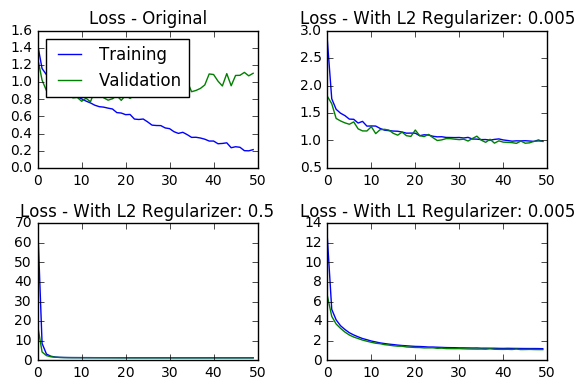

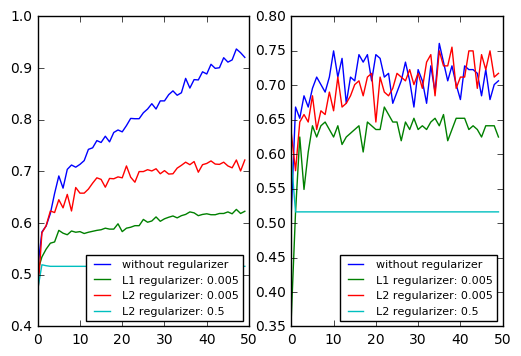

In [15]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(221)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss - Original')
plt.legend(loc='upper left')
plt.subplot(222)
plt.plot(range(len(loss_l2)), loss_l2,label='Training')
plt.plot(range(len(val_loss_l2)), val_loss_l2,label='Validation')
plt.title('Loss - With L2 Regularizer: 0.005')
plt.subplot(223)
plt.plot(range(len(loss_l2a)), loss_l2a,label='Training')
plt.plot(range(len(val_loss_l2a)), val_loss_l2a,label='Validation')
plt.title('Loss - With L2 Regularizer: 0.5')
plt.subplot(224)
plt.plot(range(len(loss_l1)), loss_l1,label='Training')
plt.plot(range(len(val_loss_l1)), val_loss_l1,label='Validation')
plt.title('Loss - With L1 Regularizer: 0.005')

#plt.savefig('06_regularizer.png',dpi=300,format='png')
#plt.close()
#print('Result saved into 06_regularizer.png')
plt.tight_layout()
plt.show()

plt.figure(0)
plt.subplot(121)
plt.plot(range(len(acc_adam)), acc_adam, label = 'without regularizer')
plt.plot(range(len(acc_adam)), acc_l1, label = 'L1 regularizer: 0.005')
plt.plot(range(len(acc_adam)), acc_l2, label = 'L2 regularizer: 0.005')
plt.plot(range(len(acc_adam)), acc_l2a, label = 'L2 regularizer: 0.5')
plt.legend(fontsize = 8, loc = 'lower right')
plt.subplot(122)
plt.plot(range(len(val_acc_adam)), val_acc_adam, label = 'without regularizer')
plt.plot(range(len(val_acc_adam)), val_acc_l1, label = 'L1 regularizer: 0.005')
plt.plot(range(len(val_acc_adam)), val_acc_l2, label = 'L2 regularizer: 0.005')
plt.plot(range(len(val_acc_adam)), val_acc_l2a, label = 'L2 regularizer: 0.5')
plt.legend(fontsize = 8, loc = 'lower right')
plt.show()

## 07_EarlyStop
---
對付 overfit 的方法 - 2

In [16]:
# %load 07_earlyStopping.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' EarlyStopping '''
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 50

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

print('Building current best model with EarlyStopping')
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

''' Setting optimizer as Adam '''
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

'''Fit models and use validation_split=0.1 '''
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1,
                    		callbacks=[early_stopping])

loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

Building current best model with EarlyStopping
Train on 1652 samples, validate on 184 samples
Epoch 1/50
0s - loss: 1.8524 - acc: 0.4607 - val_loss: 1.1708 - val_acc: 0.6304
Epoch 2/50
0s - loss: 1.2120 - acc: 0.5914 - val_loss: 1.1523 - val_acc: 0.5870
Epoch 3/50
0s - loss: 1.0792 - acc: 0.6053 - val_loss: 0.9355 - val_acc: 0.6739
Epoch 4/50
0s - loss: 1.0429 - acc: 0.6392 - val_loss: 0.8998 - val_acc: 0.6522
Epoch 5/50
0s - loss: 1.0053 - acc: 0.6453 - val_loss: 0.8774 - val_acc: 0.6630
Epoch 6/50
0s - loss: 0.9382 - acc: 0.6774 - val_loss: 0.8836 - val_acc: 0.6793
Epoch 7/50
0s - loss: 0.9553 - acc: 0.6598 - val_loss: 0.9087 - val_acc: 0.6739
Epoch 8/50
0s - loss: 0.8926 - acc: 0.6973 - val_loss: 0.8214 - val_acc: 0.7065
Epoch 9/50
0s - loss: 0.9175 - acc: 0.6816 - val_loss: 0.7692 - val_acc: 0.7065
Epoch 10/50
0s - loss: 0.8374 - acc: 0.7052 - val_loss: 0.7870 - val_acc: 0.7011
Epoch 11/50
0s - loss: 0.8290 - acc: 0.7100 - val_loss: 0.8929 - val_acc: 0.6848
Epoch 12/50
0s - loss: 0

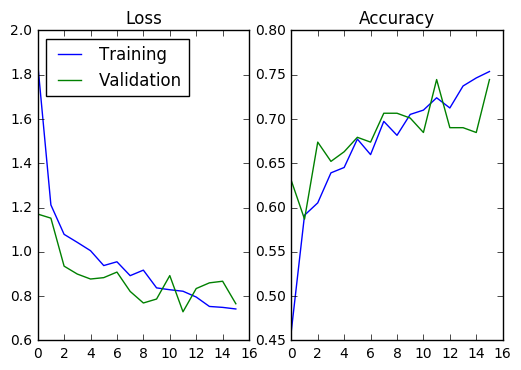

In [17]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')

plt.show()
#plt.savefig('07_earlystopping.png',dpi=300,format='png')
#plt.close()
#print('Result saved into 07_earlystopping.png')

## 08_dropout
---
對付 overfit 的方法 - 3 <br>
比較不同比例的 dropout 對 loss 和 accuracy 的影響

In [18]:
# %load 08_dropout.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' set the size of mini-batch and number of epochs'''
batch_size = 16
epochs = 100

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

def create_model_withDrp(ratio_dropout):
	
	print('Building current best model with Dropout = %g' % ratio_dropout)
	model_adam = Sequential()
	model_adam.add(Dense(128, input_dim=200))
	model_adam.add(Activation('relu'))
	model_adam.add(Dropout(ratio_dropout))
	model_adam.add(Dense(256))
	model_adam.add(Activation('relu'))
	model_adam.add(Dropout(ratio_dropout))
	model_adam.add(Dense(5))
	model_adam.add(Activation('softmax'))
	##
	model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

	return model_adam

model_adam_drp10 = create_model_withDrp(0.1)
model_adam_drp20 = create_model_withDrp(0.2)
model_adam_drp40 = create_model_withDrp(0.4)

'''Fit models and use validation_split=0.1 '''
history_adam_drp10 = model_adam_drp10.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

history_adam_drp20 = model_adam_drp20.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

history_adam_drp40 = model_adam_drp40.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

def get_result(history_model):
	train_loss = history_model.history.get('loss')
	train_acc = history_model.history.get('acc')
	valid_loss = history_model.history.get('val_loss')
	valid_acc = history_model.history.get('val_acc')
	return train_loss, train_acc, valid_loss, valid_acc

loss_adam_drp10, acc_adam_drp10, val_loss_adam_drp10, val_acc_adam_drp10 = get_result(history_adam_drp10)
loss_adam_drp20, acc_adam_drp20, val_loss_adam_drp20, val_acc_adam_drp20 = get_result(history_adam_drp20)
loss_adam_drp40, acc_adam_drp40, val_loss_adam_drp40, val_acc_adam_drp40 = get_result(history_adam_drp40)

Building current best model with Dropout = 0.1
Building current best model with Dropout = 0.2
Building current best model with Dropout = 0.4
Train on 1652 samples, validate on 184 samples
Epoch 1/100
1s - loss: 2.1878 - acc: 0.4219 - val_loss: 1.1864 - val_acc: 0.5978
Epoch 2/100
0s - loss: 1.3548 - acc: 0.5200 - val_loss: 1.1318 - val_acc: 0.5924
Epoch 3/100
0s - loss: 1.1763 - acc: 0.5751 - val_loss: 1.0109 - val_acc: 0.6304
Epoch 4/100
0s - loss: 1.1469 - acc: 0.5926 - val_loss: 0.9792 - val_acc: 0.6848
Epoch 5/100
0s - loss: 1.0526 - acc: 0.6084 - val_loss: 0.8984 - val_acc: 0.6793
Epoch 6/100
0s - loss: 1.0320 - acc: 0.6332 - val_loss: 0.8999 - val_acc: 0.6848
Epoch 7/100
0s - loss: 0.9784 - acc: 0.6495 - val_loss: 0.8625 - val_acc: 0.7174
Epoch 8/100
0s - loss: 0.9419 - acc: 0.6634 - val_loss: 0.8448 - val_acc: 0.6957
Epoch 9/100
0s - loss: 0.9110 - acc: 0.6719 - val_loss: 0.8512 - val_acc: 0.7120
Epoch 10/100
0s - loss: 0.8885 - acc: 0.6798 - val_loss: 0.8247 - val_acc: 0.7120
E

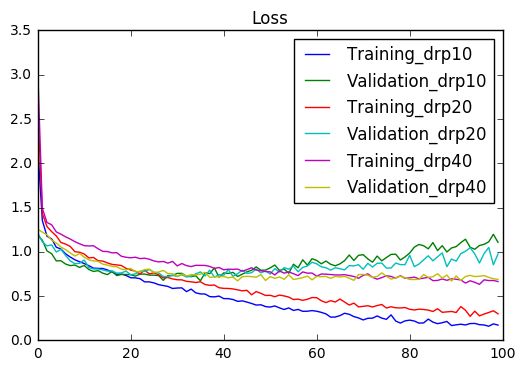

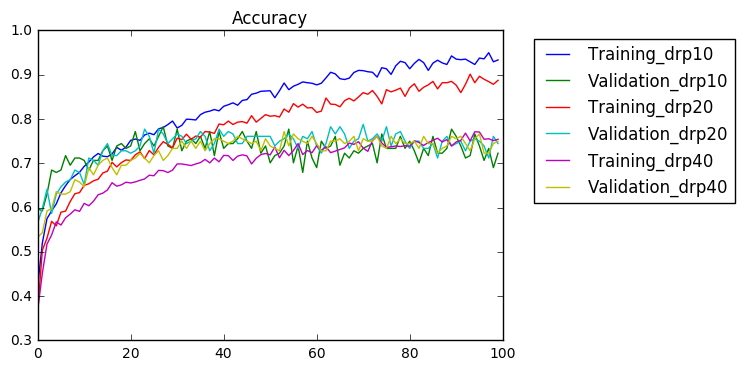

In [19]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
skp = 10
plt.figure(0)
#plt.subplot(121)
plt.plot(range(len(loss_adam_drp10)), loss_adam_drp10,label='Training_drp10')
plt.plot(range(len(val_loss_adam_drp10)), val_loss_adam_drp10,label='Validation_drp10')

plt.plot(range(len(loss_adam_drp20)), loss_adam_drp20,label='Training_drp20')
plt.plot(range(len(val_loss_adam_drp20)), val_loss_adam_drp20,label='Validation_drp20')

plt.plot(range(len(loss_adam_drp40)), loss_adam_drp40,label='Training_drp40')
plt.plot(range(len(val_loss_adam_drp40)), val_loss_adam_drp40,label='Validation_drp40')

plt.legend()
plt.title('Loss')

plt.show()

plt.plot(range(len(acc_adam_drp10)), acc_adam_drp10,label='Training_drp10')
plt.plot(range(len(val_acc_adam_drp10)), val_acc_adam_drp10,label='Validation_drp10')

plt.plot(range(len(acc_adam_drp20)), acc_adam_drp20,label='Training_drp20')
plt.plot(range(len(val_acc_adam_drp20)), val_acc_adam_drp20,label='Validation_drp20')

plt.plot(range(len(acc_adam_drp40)), acc_adam_drp40,label='Training_drp40')
plt.plot(range(len(val_acc_adam_drp40)), val_acc_adam_drp40,label='Validation_drp40')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2)
plt.title('Accuracy')

plt.show()


## 09_batchnormalization
---
比較 dropout 和 batchnormaization 的效果

In [20]:
# %load 09_batchnorm.py
''' Import theano and numpy '''
from __future__ import print_function
from past.builtins import execfile
import numpy as np
execfile('00_readingInput.py')

''' set the size of mini-batch and number of epochs'''
batch_size = 32
epochs = 100

''' Import keras to build a DL model '''
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

def create_model_withDrp_bn(ratio_dropout, bn = False):
    print('Building current best model with Dropout = %g' % ratio_dropout)
    model_adam = Sequential()
    model_adam.add(Dense(128, input_dim=200))
    model_adam.add(Activation('relu'))
    if bn:
        model_adam.add(BatchNormalization())
    model_adam.add(Dropout(ratio_dropout))
    
    model_adam.add(Dense(256))
    if bn:
        model_adam.add(BatchNormalization())
    model_adam.add(Activation('relu'))
    model_adam.add(Dropout(ratio_dropout))
    
    model_adam.add(Dense(5))
    model_adam.add(Activation('softmax'))
    ##
    model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])
    return model_adam

model_adam_drp40 = create_model_withDrp(0.4)
model_adam_bn = create_model_withDrp_bn(0, bn = True)
model_adam_bn_ks = create_model_withDrp_bn(0, bn = True)
model_adam_drp40_bn = create_model_withDrp_bn(0.4, bn = True)

'''Fit models and use validation_split=0.1 '''
history_adam_drp40 = model_adam_drp40.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

history_adam_bn = model_adam_bn.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

history_adam_drp40_bn = model_adam_drp40_bn.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)

batch_size = 2
history_adam_bn_ks = model_adam_bn_ks.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=2,
							shuffle=True,
                    		validation_split=0.1)



def get_result(history_model):
	train_loss = history_model.history.get('loss')
	train_acc = history_model.history.get('acc')
	valid_loss = history_model.history.get('val_loss')
	valid_acc = history_model.history.get('val_acc')
	return train_loss, train_acc, valid_loss, valid_acc

loss_adam_drp40, acc_adam_drp40, val_loss_adam_drp40, val_acc_adam_drp40 = get_result(history_adam_drp40)
loss_adam_bn, acc_adam_bn, val_loss_adam_bn, val_acc_adam_bn = get_result(history_adam_bn)
loss_adam_bn_ks, acc_adam_bn_ks, val_loss_adam_bn_ks, val_acc_adam_bn_ks = get_result(history_adam_bn_ks)
loss_adam_drp40_bn, acc_adam_drp40_bn, val_loss_adam_drp40_bn, val_acc_adam_drp40_bn = get_result(history_adam_drp40_bn)

Building current best model with Dropout = 0.4
Building current best model with Dropout = 0
Building current best model with Dropout = 0
Building current best model with Dropout = 0.4
Train on 1652 samples, validate on 184 samples
Epoch 1/100
1s - loss: 4.2484 - acc: 0.3360 - val_loss: 1.2929 - val_acc: 0.5272
Epoch 2/100
0s - loss: 1.9600 - acc: 0.3959 - val_loss: 1.1958 - val_acc: 0.5870
Epoch 3/100
0s - loss: 1.5044 - acc: 0.4661 - val_loss: 1.2085 - val_acc: 0.6087
Epoch 4/100
0s - loss: 1.3764 - acc: 0.5000 - val_loss: 1.1764 - val_acc: 0.6196
Epoch 5/100
0s - loss: 1.3078 - acc: 0.5260 - val_loss: 1.1780 - val_acc: 0.6196
Epoch 6/100
0s - loss: 1.2639 - acc: 0.5357 - val_loss: 1.1639 - val_acc: 0.6304
Epoch 7/100
0s - loss: 1.2274 - acc: 0.5587 - val_loss: 1.1179 - val_acc: 0.6413
Epoch 8/100
0s - loss: 1.1846 - acc: 0.5757 - val_loss: 1.0616 - val_acc: 0.6576
Epoch 9/100
0s - loss: 1.1585 - acc: 0.5726 - val_loss: 1.0218 - val_acc: 0.6304
Epoch 10/100
0s - loss: 1.1358 - acc: 0.

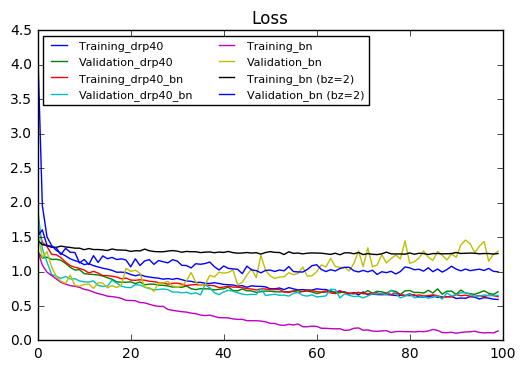

Result saved into 08_dropout_loss/acc.png


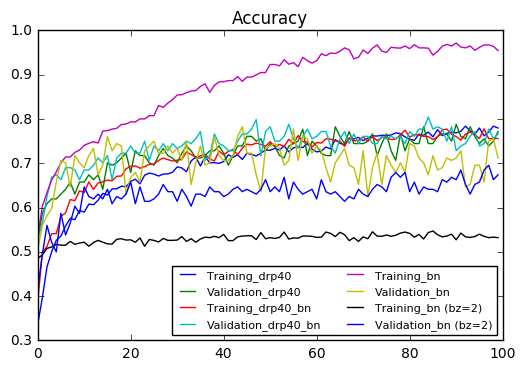

In [21]:
''' Visualize the loss and accuracy of both models'''
import matplotlib.pyplot as plt
skp = 10
plt.figure(0)
#plt.subplot(121)
plt.plot(range(len(loss_adam_drp40)), loss_adam_drp40,label='Training_drp40')
plt.plot(range(len(val_loss_adam_drp40)), val_loss_adam_drp40,label='Validation_drp40')

plt.plot(range(len(loss_adam_drp40_bn)), loss_adam_drp40_bn,label='Training_drp40_bn')
plt.plot(range(len(val_loss_adam_drp40_bn)), val_loss_adam_drp40_bn,label='Validation_drp40_bn')

plt.plot(range(len(loss_adam_bn)), loss_adam_bn,label='Training_bn')
plt.plot(range(len(val_loss_adam_bn)), val_loss_adam_bn,label='Validation_bn')

plt.plot(range(len(loss_adam_bn_ks)), loss_adam_bn_ks,label='Training_bn (bz=2)')
plt.plot(range(len(val_loss_adam_bn_ks)), val_loss_adam_bn_ks,label='Validation_bn (bz=2)')


plt.legend(loc = 2, ncol = 2, fontsize = 8)
plt.title('Loss')
#plt.savefig('09_bn_vs_dropout_loss.png',dpi=300,format='png')
#plt.close()
plt.show()

plt.plot(range(len(acc_adam_drp40)), 
         acc_adam_drp40,
         label='Training_drp40')
plt.plot(range(len(val_acc_adam_drp40)), 
         val_acc_adam_drp40,
         label='Validation_drp40')
plt.plot(range(len(acc_adam_drp40_bn)), 
         acc_adam_drp40_bn,
         label='Training_drp40_bn')
plt.plot(range(len(val_acc_adam_drp40_bn)), 
         val_acc_adam_drp40_bn,
         label='Validation_drp40_bn')
plt.plot(range(len(acc_adam_bn)), 
         acc_adam_bn,
         label='Training_bn')
plt.plot(range(len(val_acc_adam_bn)), 
         val_acc_adam_bn,
         label='Validation_bn')
plt.plot(range(len(acc_adam_bn_ks)), 
         acc_adam_bn_ks,
         label='Training_bn (bz=2)')
plt.plot(range(len(val_acc_adam_bn_ks)), 
         val_acc_adam_bn_ks,
         label='Validation_bn (bz=2)')

plt.legend(loc = 4, ncol = 2, fontsize = 8)
plt.title('Accuracy')
#plt.show()

#plt.savefig('09_bn_vs_dropout_accuracy.png',dpi=300,format='png')
#plt.close()
print('Result saved into 08_dropout_loss/acc.png')